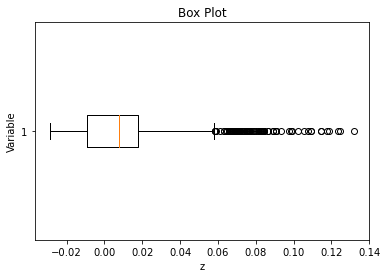

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 
# Load the dataset
df = pd.read_csv('mouthWidenessData1.csv')

plt.boxplot(df['z'], vert=False)
plt.ylabel('Variable')
plt.xlabel('z')
plt.title('Box Plot')
plt.show()

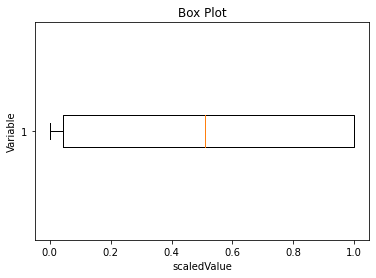

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 
# Load the dataset
df = pd.read_csv('mouthWidenessData1.csv')

plt.boxplot(df['scaledValue'], vert=False)
plt.ylabel('Variable')
plt.xlabel('scaledValue')
plt.title('Box Plot')
plt.show()

[0.14239084]
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2', 'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3']
[[  24.2735987     7.37318134  -24.2204243    39.65292018  -36.72554185
  -265.58151148   55.42195855  -12.89257628  231.80749177 -121.22899618
   314.83504451  120.31485829 -128.38928698 -762.81821586  671.42468096
    48.4001318  -190.80289448  631.81602523 -703.65027863]]


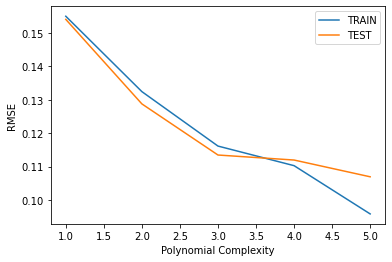

In [6]:
######## Find the mouth wideness value for across camera distance given a user created data file from training UI 
######## Input: distance of mouth wideness from mediapipe & z value of 1st mouth point 
######## Training Data: mouth wideness value for across camera distance, wideness user determined.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
 
# Load the dataset
df = pd.read_csv('mouthWidenessData3.csv')

df2 = df.drop_duplicates();

# used the following link to help with the polynomial regression -- great bit of copied code
# https://pieriantraining.com/nonlinear-regression-in-machine-learning-python/
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data

X = df2[['wideness', 'z', 'eyeDist']]; # adding the eye distance was the key to getting a good fit, https://github.com/HotaruK/mediapipe_demo/blob/main/keypoints/face_mesh_no.jpg helpful
y = df2[['scaledValue']];

poly_features = polynomial_converter.fit_transform(X);
poly_features.shape;

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

test_predictions = model.predict(X_test)

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

##########

# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):

    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate Errors

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

##########

plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

#################

# Based on our chart, could have also been degree=4, but
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
final_model = LinearRegression()
final_model.fit(final_poly_converter.fit_transform(X),y)

# print the coefficients and intercept so can use the equation in the dinosaur model UI
print(final_model.intercept_)
print(final_poly_converter.get_feature_names())
print(final_model.coef_)
# list(zip(X, final_model.coef_))

# Y = (m1 * x1) + (m2 * x2) + (m3 * x1 ** 2) + (m4 * x2 ** 2) + (m5 * x1 * x2)

# Y = (m1 * x1) + (m2 * x2) + (m3 * x1 ** 2) + (m4 * x2 ** 2) + + (m5 * x1 ** 3) + (m6 * x2 ** 3) + (m7 * x1 * x2) + (m8 * x2 ** x3) + (m9 * x1 * x2)


